In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud

import warnings
warnings.filterwarnings(action='ignore')

In [42]:
df=pd.read_csv('Emotion_classify_Data.csv')

In [43]:
df.head()

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


In [44]:
df.shape

(5937, 2)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5937 entries, 0 to 5936
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  5937 non-null   object
 1   Emotion  5937 non-null   object
dtypes: object(2)
memory usage: 92.9+ KB


In [46]:
df.isnull().sum()

Comment    0
Emotion    0
dtype: int64

In [47]:
z = df.groupby('Emotion', as_index=False)[['Comment']].count().rename({'Comment' : 'count'}, axis=1).sort_values(by='count',ascending=False)

In [48]:
z

,Emotion,count
0,anger,2000
2,joy,2000
1,fear,1937


In [49]:
fig=px.pie(z,names='Emotion',values='count',color='Emotion',hole=0.7,labels={'count':'count'}
,template='seaborn',title='<b> Percentual of each emotion </b>')
fig.update_layout(title_x=0.5)

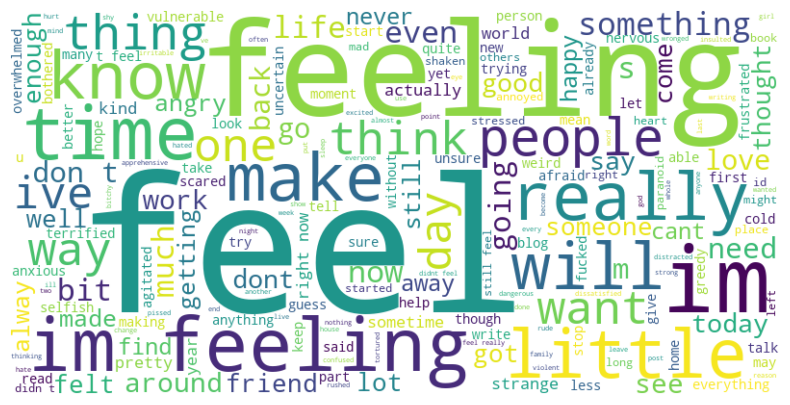

In [50]:
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Comment']))

# Show the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [51]:
from collections import Counter
import nltk
from nltk.corpus import stopwords

In [52]:
# Stopword preprocessing
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df['Comment'] = df['Comment'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

df['Comment']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JASON\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0       seriously hate one subject death feel reluctan...
1                              im full life feel appalled
2       sit write start dig feelings think afraid acce...
3       ive really angry r feel like idiot trusting fi...
4       feel suspicious one outside like rapture happe...
                              ...                        
5932                                begun feel distressed
5933    left feeling annoyed angry thinking center stu...
5934    ever get married everything ready offer got to...
5935    feel reluctant applying want able find company...
5936           wanted apologize feel like heartless bitch
Name: Comment, Length: 5937, dtype: object

In [53]:
# Word Frequency Count
word_freq = Counter(' '.join(df['Comment']).split())
word_freq



Counter({'seriously': 18,
         'hate': 53,
         'one': 210,
         'subject': 6,
         'death': 10,
         'feel': 4047,
         'reluctant': 59,
         'drop': 7,
         'im': 943,
         'full': 25,
         'life': 178,
         'appalled': 10,
         'sit': 29,
         'write': 71,
         'start': 63,
         'dig': 3,
         'feelings': 104,
         'think': 216,
         'afraid': 77,
         'accept': 10,
         'possibility': 7,
         'might': 57,
         'make': 183,
         'ive': 199,
         'really': 323,
         'angry': 92,
         'r': 6,
         'like': 992,
         'idiot': 7,
         'trusting': 19,
         'first': 77,
         'place': 57,
         'suspicious': 30,
         'outside': 18,
         'rapture': 1,
         'happened': 25,
         'something': 193,
         'jealous': 50,
         'becasue': 1,
         'wanted': 50,
         'kind': 76,
         'love': 145,
         'true': 16,
         'connection': 8,

In [54]:
# Convert count to a DataFrame to create a bar chart
word_freq_df = pd.DataFrame.from_dict(word_freq, orient='index', columns=['count']).reset_index()
word_freq_df = word_freq_df.rename(columns={'index': 'word'})
word_freq_df

,word,count
0,seriously,18
1,hate,53
2,one,210
3,subject,6
4,death,10
...,...,...
8829,planting,1
8830,spontaneous,1
8831,urgh,1
8832,clubs,1


In [55]:
# Sort words by count
word_freq_df = word_freq_df.sort_values(by='count', ascending=False)
word_freq_df.head(20)

,word,count
5,feel,4047
56,feeling,1964
27,like,992
8,im,943
115,little,326
24,really,323
75,know,315
218,time,294
192,get,292
80,want,267


In [56]:
# Create an interactive bar chart with Plotly Express
fig = px.bar(word_freq_df.head(20), x='word', y='count', title='Word Frequency Analysis')
fig.update_xaxes(title_text='Word')
fig.update_yaxes(title_text='Frequency')
fig.show()

In [57]:
# Get size of each comment
df['Comment_Length'] = df['Comment'].apply(len)

# Create the text size histogram
fig = px.histogram(df, x='Comment_Length', title='Text size histogram')
fig.show()

In [58]:
import re

In [59]:
# Remove stop words
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in (stopwords.words('english'))])
    return text

# Remove url  
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

# Remove punct
def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

# Remove html 
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

# Decontraction text
def decontraction(text):
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)
    
    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    return text  

# Seperate alphanumeric
def seperate_alphanumeric(text):
    words = text
    words = re.findall(r"[^\W\d_]+|\d+", words)
    return " ".join(words)

# Replace repeated characters
def cont_rep_char(text):
    tchr = text.group(0) 
    
    if len(tchr) > 1:
        return tchr[0:2] 

# Replace unique characters
def unique_char(rep, text):
    substitute = re.sub(r'(\w)\1+', rep, text)
    return substitute

# Replace non-alphabetic characters
def char(text):
    substitute = re.sub(r'[^a-zA-Z]',' ',text)
    return substitute

In [60]:
df['clean_text'] = df['Comment']

# apply functions on text
df['clean_text'] = df['clean_text'].apply(lambda x : remove_url(x))
df['clean_text'] = df['clean_text'].apply(lambda x : decontraction(x))
df['clean_text'] = df['clean_text'].apply(lambda x : seperate_alphanumeric(x))
df['clean_text'] = df['clean_text'].apply(lambda x : unique_char(cont_rep_char,x))
df['clean_text'] = df['clean_text'].apply(lambda x : char(x))
df['clean_text'] = df['clean_text'].apply(lambda x : x.lower())
df['clean_text'] = df['clean_text'].apply(lambda x : remove_stopwords(x))

In [68]:
X = df['clean_text']
y = df['Emotion']

In [69]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE()
# X,y = smote.fit_resample(X,y[0])

# Train test split

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4749,)
(4749,)
(1188,)
(1188,)


In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()

X_train = [text.lower() for text in X_train]
X_test = [text.lower() for text in X_test]

X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

In [88]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4749, 7758)
(4749,)
(1188, 7758)
(1188,)


# Model building

In [89]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [90]:
NB_model = MultinomialNB()

NB_model.fit(X_train, y_train)

MultinomialNB()

In [91]:
RFC_model = RandomForestClassifier()

RFC_model.fit(X_train, y_train)

RandomForestClassifier()

In [92]:
SVM_model = svm.SVC()

SVM_model.fit(X_train, y_train)

SVC()

In [93]:
from sklearn.metrics import accuracy_score

In [94]:
y_pred = NB_model.predict(X_test)

In [95]:
acc = accuracy_score(y_test, y_pred)
acc

0.9082491582491582

In [96]:
# Get the predictions for X_test and store it in y_pred
y_pred = RFC_model.predict(X_test)

In [97]:
# Print Accuracy
print(accuracy_score(y_test, y_pred))

0.9427609427609428


In [98]:
y_pred = SVM_model.predict(X_test)

In [99]:
# Print Accuracy
print(accuracy_score(y_test, y_pred))

0.9368686868686869


In [102]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

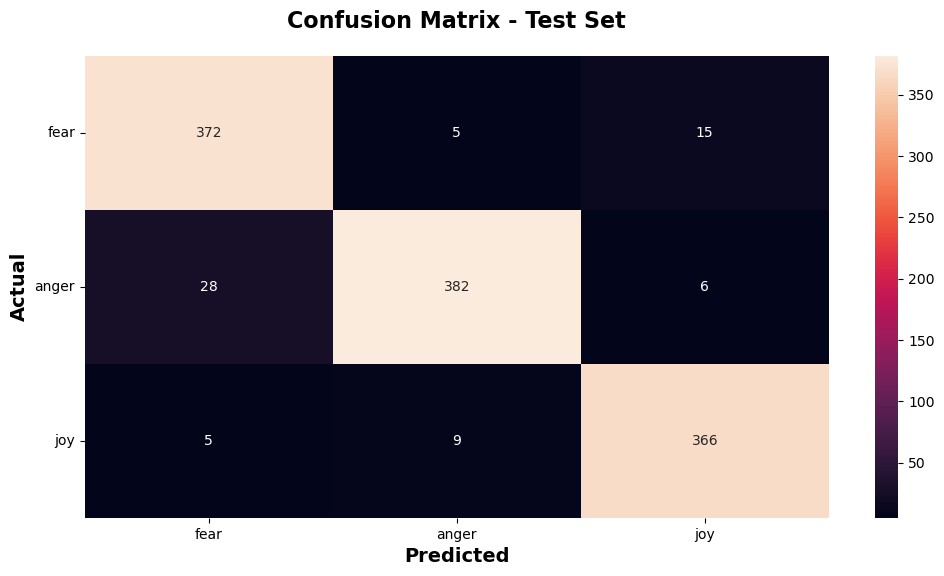

In [104]:
test_pred = RFC_model.predict(X_test)
test_labels = y_test

confusion_matrix = confusion_matrix(test_labels, test_pred)

class_names = ["fear", "anger", "joy"]
plt.figure(figsize=(12, 6))
ax = sns.heatmap(confusion_matrix, annot=True, fmt="d")

ax.set_xticklabels(class_names, rotation=0)
ax.set_yticklabels(class_names, rotation=0)

ax.set_xlabel('Predicted', fontsize=14, weight='bold')
ax.set_ylabel('Actual', fontsize=14, weight='bold')

ax.set_title('Confusion Matrix - Test Set', fontsize=16, weight='bold', pad=20)

plt.show()